In [1]:
# 데이터 조작 라이브러리
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
url = "https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/pima-indians-diabetes.csv"

In [3]:
baseData = pd.read_csv(url)
baseData

,pregnancies,glucose,diastolic,trceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
import seaborn as sns

<AxesSubplot:xlabel='diabetes', ylabel='count'>

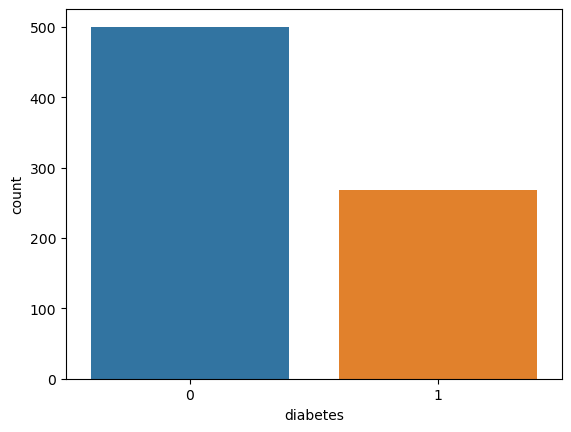

In [5]:
sns.countplot(data = baseData, x="diabetes")

In [6]:
baseData.dtypes

pregnancies      int64
glucose          int64
diastolic        int64
trceps           int64
insulin          int64
bmi            float64
dpf            float64
age              int64
diabetes         int64
dtype: object

In [7]:
label = ["diabetes"]
features = list(baseData.select_dtypes(np.number).columns)
features = list(set(features)-set(label))
print("label: {}".format(label))
print("features: {}".format(features))

label: ['diabetes']
features: ['diastolic', 'dpf', 'insulin', 'glucose', 'trceps', 'bmi', 'age', 'pregnancies']


In [8]:
featuresData = baseData.loc[:,features]
labelData = baseData.loc[:,label]

In [9]:
trainingData_features,\
testData_features,\
trainingData_label,\
testData_label = train_test_split(featuresData,labelData, test_size=0.2, random_state=1)

In [10]:
testIndex = testData_label.index

In [11]:
print(trainingData_features.shape)
print(trainingData_label.shape)
print(testData_features.shape)
print(testData_label.shape)

(614, 8)
(614, 1)
(154, 8)
(154, 1)


In [12]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(len(features),)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


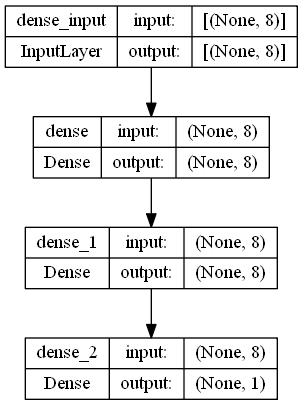

In [14]:
# 모델 시각화
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', 
           show_shapes=True, 
           show_layer_names=True)

In [15]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [16]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
history = model.fit(trainingData_features,
                         trainingData_label,
                         epochs=100,
                         batch_size=32,
                         validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 1s 19ms/step - loss: 4.5929 - accuracy: 0.3401 - val_loss: 3.1615 - val_accuracy: 0.3659
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 2.5781 - accuracy: 0.3218 - val_loss: 1.7283 - val_accuracy: 0.3659
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 1.5356 - accuracy: 0.4358 - val_loss: 1.2667 - val_accuracy: 0.4553
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 1.2465 - accuracy: 0.5031 - val_loss: 1.1469 - val_accuracy: 0.5122
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 1.1837 - accuracy: 0.5356 - val_loss: 1.0898 - val_accuracy: 0.5285
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 1.1301 - accuracy: 0.5418 - val_loss: 1.0432 - val_accuracy: 0.5285
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 1.0872 - accuracy: 0.5560 - val_loss: 1.0028 - val_accuracy: 0.5447
Epoch 8/100


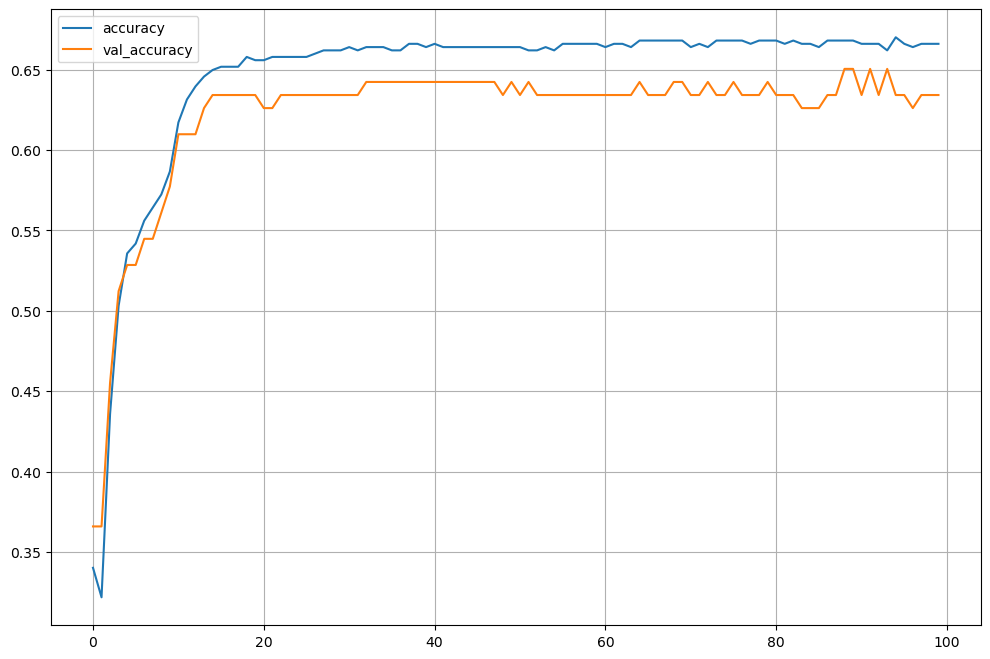

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))

# 훈련 데이터의 accuracy
plt.plot(history.history['accuracy'])

# 검증 데이터의 accuracy
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.grid()
plt.show()

In [19]:
predict = pd.DataFrame(model.predict(testData_features), columns=["predict"])
predict

5/5 [==============================] - 0s 999us/step


,predict
0,0.363089
1,0.466698
2,0.355432
3,0.078390
4,0.196053
...,...
149,0.320471
150,0.435234
151,0.466698
152,0.340618


In [20]:
testData_label.reset_index(drop=True, inplace=True)

In [21]:
resultData = pd.concat([testData_label, predict], axis = 1)
resultData

,diabetes,predict
0,0,0.363089
1,0,0.466698
2,0,0.355432
3,0,0.078390
4,0,0.196053
...,...,...
149,0,0.320471
150,0,0.435234
151,1,0.466698
152,0,0.340618


In [22]:
resultData.loc[resultData.predict<0.5] = 0
resultData.loc[resultData.predict>=0.5] = 1
resultData.predict = resultData.predict.astype(int)

In [23]:
resultData

,diabetes,predict
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
149,0,0
150,0,0
151,0,0
152,0,0


In [24]:
resultData.loc[(resultData.diabetes==0) & (resultData.predict!=0)]

,diabetes,predict


In [25]:
resultData.loc[(resultData.diabetes==1) & (resultData.predict!=1)]

,diabetes,predict


# 예측

In [27]:
features

['diastolic',
 'dpf',
 'insulin',
 'glucose',
 'trceps',
 'bmi',
 'age',
 'pregnancies']

In [91]:
baseData.glucose.drop_duplicates()

0      148
1       85
2      183
3       89
4      137
      ... 
680     56
696    169
722    149
737     65
759    190
Name: glucose, Length: 136, dtype: int64

In [104]:
inDiastolic = 42
inDpf = 0.222
inInsulin = 543
inGlucose = 190
inTrceps = 35
inBmi = 50.1
inAge = 50
inPregnancies = 18

In [105]:
testDf = pd.DataFrame([[inDiastolic,inDpf,inInsulin,inGlucose,inTrceps,inBmi,inAge,inPregnancies]])

In [106]:
result = model.predict(testDf)
result

1/1 [==============================] - 0s 21ms/step


array([[0.46669763]], dtype=float32)

In [107]:
if result < 0.5 :
    print("건강")
else :
    print("당뇨")

건강


In [109]:
corrDf = baseData.corr()
corrDf

,pregnancies,glucose,diastolic,trceps,insulin,bmi,dpf,age,diabetes
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
trceps,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
dpf,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [112]:
corrDf.loc[(corrDf.diabetes>0.3)&(corrDf.diabetes!=1)]

,pregnancies,glucose,diastolic,trceps,insulin,bmi,dpf,age,diabetes
glucose,0.129459,1.0,0.15259,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581


In [113]:
import math
# 정확도 추론
loss, accuracy = model.evaluate(testData_features, testData_label, verbose=1)
print(loss)
print(accuracy)

5/5 [==============================] - 0s 2ms/step - loss: 0.6236 - accuracy: 0.6494
0.623553991317749
0.649350643157959
